In [128]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [129]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv("test.csv")

if 'SalePrice' not in df2.columns:
    df2['SalePrice'] = 0
    
df = pd.concat([df1, df2], axis=0)
df = df.set_index("Id")

In [130]:
 # Extracting columns with missing values
df_null  = df[df.isnull().sum()[df.isnull().sum()>0].index] 

<Axes: ylabel='Id'>

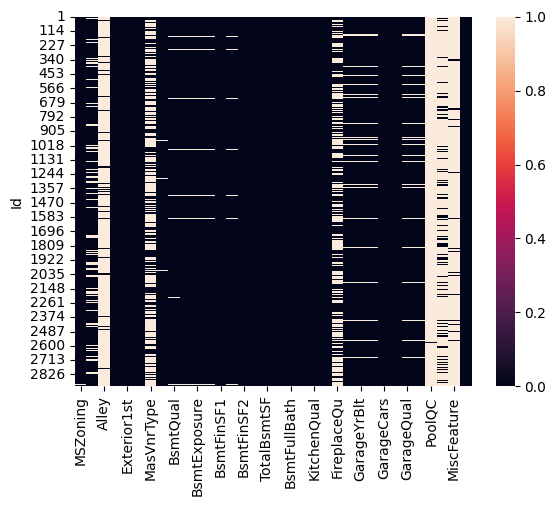

In [131]:
sns.heatmap(df_null.isnull())

In [132]:
df_objects =  df[df.select_dtypes(include=['object']).columns]
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

In [133]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

df_objects = df_objects.fillna('null')

df_objects_encoded = pd.get_dummies(df_objects)

In [134]:
df_objects['Utilities'].value_counts()

Utilities
AllPub    2916
null         2
NoSeWa       1
Name: count, dtype: int64

In [135]:
for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i, axis = 1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [136]:
new_df = pd.concat([df, df_objects_encoded], axis = 1)

In [137]:
len(new_df.columns)

304

In [138]:
len(df.columns), len(df_objects_encoded.columns)

(74, 230)

In [139]:
new_df = new_df.drop(df.select_dtypes(include=['object']), axis = 1)

new_df.isna().sum()[new_df.isna().sum() > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [140]:
Mode_columns = ['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']
Mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', 'GarageArea']

for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

new_df.isna().sum()[new_df.isna().sum() > 0]

Series([], dtype: int64)

In [141]:
training_data = new_df[0:len(df1)]
testing_data = new_df[len(df1):]
testing_data = testing_data.drop(columns='SalePrice')

plt.figure(figsize=(15, 8))
# sns.heatmap(training_data.corr(), annot=True, cmap="YlGnBu")

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [143]:
X = training_data.drop(columns='SalePrice')
y = training_data['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)
Y_train = np.reshape(Y_train,(-1, 1))
Y_test = np.reshape(Y_test,(-1, 1))
X_train.shape, Y_train.shape

((1168, 266), (1168, 1))

In [ ]:
model_1 = LinearRegression()
model_1.fit(X, y)

y_pred = model_1.predict(X_test)
mean_squared_error(Y_test, y_pred)

457433385.4129353

In [ ]:
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
model_2.fit(X, y)

y_pred = model_2.predict(X_test)
mean_squared_error(Y_test, y_pred)

5307.529543732943

In [152]:
forest = RandomForestRegressor()
forest.fit(X, y)
y_pred = forest.predict(X_test)
mean_squared_error(Y_test, y_pred)
# forest.score(X_test, Y_test)

123324780.74930173

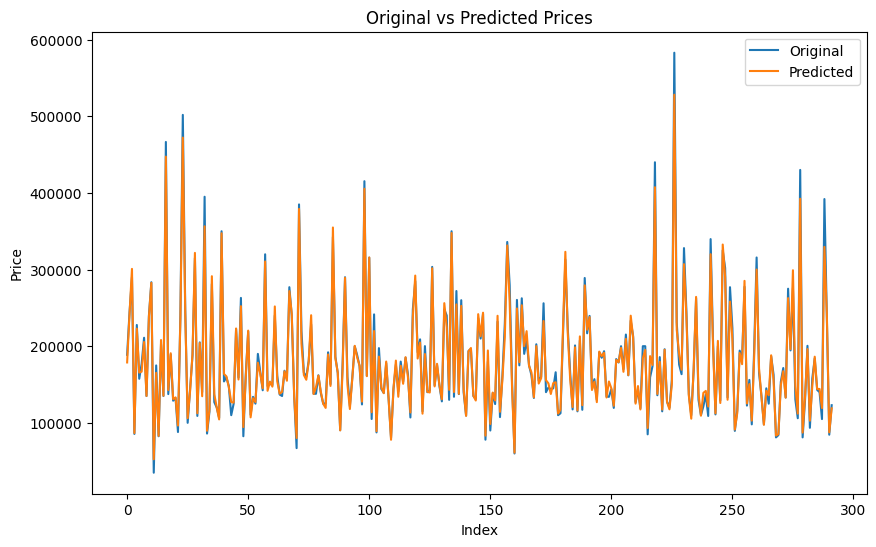

In [ ]:
sort_indices = np.argsort(Y_test)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(Y_test)), Y_test, label='Original')
plt.plot(np.arange(len(Y_test)), y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original vs Predicted Prices')
plt.legend()
plt.show()

In [ ]:
pred = model_2.predict(testing_data)

final = pd.DataFrame()
final['Id'] = testing_data.index
final['SalePrice'] = pred

# Write DataFrame to a CSV file without index
final.to_csv('output.csv', index=False)